#### Final Project Submission
* Student Name: JAMES WACHIRA MUTHEE
* Mode of Study: PART TIME
* Project: End of Phase Project
* Technical Mentor: Daniel Ekale


#### 1. Business Understanding
In today's digital landscape, social media platforms like Twitter serve as a crucial medium for public opinion and brand perception. Businesses and organizations need to understand how customers feel about specific entities—such as products, brands, or public figures—to make data-driven decisions. This project aims to develop an entity-level sentiment analysis model that can accurately classify tweets as Positive, Negative, Neutral or Irrelevant concerning a given entity. By analyzing sentiment at the entity level, businesses can gain deeper insights into customer sentiment, identify trends, manage reputations, and improve customer engagement strategies.

#### 2. Problem Statement
Businesses struggle to extract meaningful insights from social media due to the lack of entity-specific sentiment analysis. Traditional sentiment analysis classifies entire messages without focusing on a given entity. This project aims to develop an entity-level sentiment analysis model to classify tweets as Positive, Negative, Neutral or Irrelevant concerning a specific entity, helping businesses track sentiment trends and improve decision-making.

#### 3. Business Objectives
The purpose of this project is to create an entity-level sentiment analysis model that can accurately classify tweets as Positive, Negative, Neutral or Irrelevant regarding a given entity. This model will help businesses and organizations to:
* Enhance Brand and Reputation Management 
* Improve Customer Engagement Strategies 
* Support Data-Driven Decision-Making
  
### 4. Target Audience
The Target audience for this project are:
* Businesses and brands
* Marketing and PR teams
* Customer Support Teams
* Investors and Market Analysts

#### 5. Data
The Sentiment Analysis dataset used in this project was obtained from https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

#### 6. Data Understanding
In this step, we will perform a comprehensive exploration of the dataset to gain insights into its structure and quality. The key steps involved include:

* Importing necessary libraries required for data manipulation, visualization, and sentiment analysis.
* Loading the Twitter Sentiment Analysis dataset from a CSV file.
* Exploring the dataset to understand its structure, distribution of sentiment classes, and key features.
* Handling missing values by identifying and addressing any gaps in the data.
* Performing text preprocessing, including cleaning tweets which involves removing URLs, mentions, hashtags, special characters, and stopwords.
* Visualizing sentiment distribution using bar charts and other exploratory data analysis (EDA) techniques to gain deeper insights.
 

#### 7. Data Pre-processing
This step will involve transforming raw data into a structured format suitable for modeling. The following transformations will be done to the data:
1. Label Encoding the Target Feature
2. Word Lemmatization
3. Removal of Stopwords
4. Word Tokenization
5. Applying Regular Expressions (Regex)
6. Converting Text to Lowercase
 
  
   
#### 8. Modelling
This step will involve developing models that will enable us understand the sentiment expressed by a tweet. Two models will be created:
1. Logistic Regression - Baseline Model
2. Random Forest Model

#### 9. Model Evaluation
In this step, we will assess the performance of our model to determine its accuracy and effectiveness in predicting sentiment. 

#### 10. Metrics of Success
The Models' Performance will be evaluated against accuracy score metric. The model with the highest accuracy score will be regarded as the best model.

#### 11. Testing the Model
This process will involve assessing our model’s performance to ensure it generalizes well to unseen data. I shall use validation data on this process. 

#### 11. Findings
Upon evaluation of the models and testing of the best model identified, the findings of these steps will be highlighted.

#### 12. Conclusion
Selecting the model with the highest accuracy score will ensure the most reliable sentiment classification that will enable businesses to make informed decisions, monitor brand perception, and enhance customer engagement with greater confidence.

#### 1. Loading the Libraries

In [544]:
#  Setup and Data Loading
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer, LabelEncoder
import warnings
warnings.simplefilter("ignore")



##### 1.1 Loading the necessary resources

In [545]:
# Download necessary nltk resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### 2. Loading the datasets

In [546]:
# Loading the data 
df_train = pd.read_csv('twitter_training.csv')
df_val = pd.read_csv('twitter_validation.csv')

# Checking the first few rows of the training dataset
df_train.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [547]:
# Checking the first few rows of the training dataset
df_val.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


* The data is loaded from a csv file and the first 5 rows of the training and validation datasets displayed

#### 3. Data Understanding

In [548]:
# Checking the dimensions of the datasets
df_train.shape, df_val.shape

print(f" 1. The training dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns")
print(f" 2. The validation dataset has {df_val.shape[0]} rows and {df_val.shape[1]} columns")

 1. The training dataset has 74681 rows and 4 columns
 2. The validation dataset has 999 rows and 4 columns


In [549]:
# Checking the column names for the training and validation datasets
print(f" 1. Training Set Column names : {df_train.columns}")

print(f" 2. Validation Set Column names : {df_val.columns}")


 1. Training Set Column names : Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')
 2. Validation Set Column names : Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')


* From the above column names of the training dataset, it is that clear those are not the actual column names but the top names of the first row of each dataset. 
* For proper interpretation and understanding of the datasets, the column names will be renamed.


In [550]:
# Renaming the columns for clarity in both datasets
df_train.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']
df_val.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']

print("Training and Validation datasets renamed.")

# Checking for the training data with renamed columns
df_train.head()


Training and Validation datasets renamed.


,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


* The training dataset columns have been renamed to ID, Entity, Sentiment and Tweet

In [551]:
# Checking for unique values in the sentiment column
df_train["Sentiment"].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [552]:
# Checking for unique values in the entity column
df_train["Entity"].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [553]:
# Checking the distribution of the sentiment
df_train['Sentiment'].value_counts()

Sentiment
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [554]:
# Checking for the validation data with renamed columns
df_val.head()


,ID,Entity,Sentiment,Tweet
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [555]:
# Checking for missing values
print("Missing data in training set:")
print(df_train.isnull().sum())

Missing data in training set:
ID             0
Entity         0
Sentiment      0
Tweet        686
dtype: int64


* Only the tweet column has missing values. We shall drop the rows of the tweet column having the missing values

In [556]:
# Dropping rows with missing Tweet texts
df_train = df_train.dropna(subset=['Tweet'])
print("After dropping missing data, training data rows:", len(df_train))

After dropping missing data, training data rows: 73995


In [557]:
# Checking for missing Values in Validation data
df_val.isna().sum()

ID           0
Entity       0
Sentiment    0
Tweet        0
dtype: int64

* The validation dataset has no missing values

In [558]:
# Checking the training dataset data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         73995 non-null  int64 
 1   Entity     73995 non-null  object
 2   Sentiment  73995 non-null  object
 3   Tweet      73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


* The training dataset has one column with integer data type and three columns with text or categorical data type

#### 4. Exploratory Data Analysis

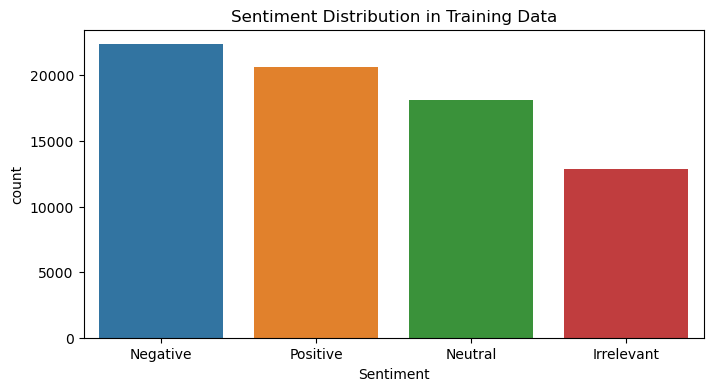

In [501]:
# Sentiment distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df_train, x='Sentiment', order=df_train['Sentiment'].value_counts().index)
plt.title("Sentiment Distribution in Training Data")
plt.show()


* From the graph, we can observe how tweets are distributed among the different sentiments. 
* This distribution will help us in understanding any potential class imbalance, which will be important when training our sentiment analysis model.

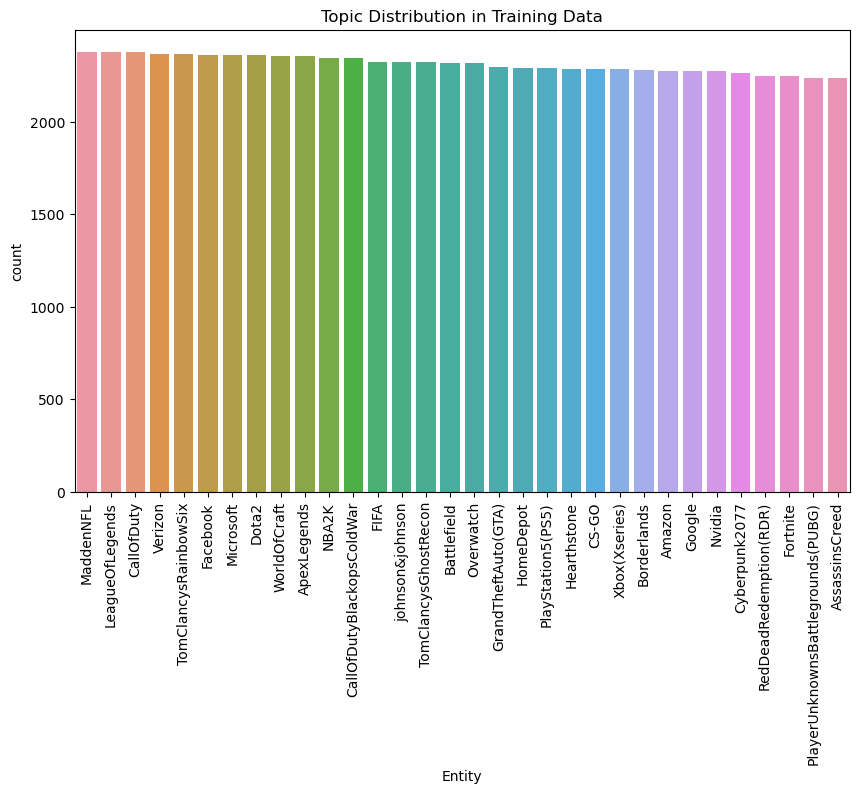

In [502]:
# Topic distribution in Training data
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='Entity', order=df_train['Entity'].value_counts().index)
plt.title("Topic Distribution in Training Data")
plt.xticks(rotation=90)
plt.show()


* This countplot helps to identify which topics are more dominant in the dataset and will alert us to potential biases or imbalances in the various topics represented.

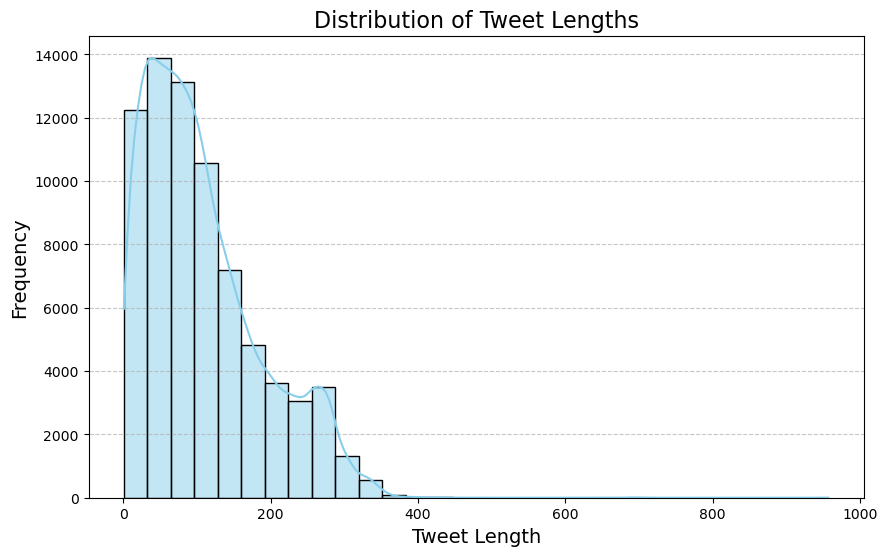

In [503]:
# Distribution of tweet length
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Tweet'].apply(len), bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Tweet Lengths', fontsize=16)
plt.xlabel('Tweet Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 5. Data Preparation

##### 5.1 Label Encoding the Target Feature

In [559]:
# Define mapping
label_mapping = {'Neutral': 0, 'Positive': 1, 'Negative': 2, 'Irrelevant': 3}

# Applying mapping on training and validation datasets
df_train["Sentiment"] = df_train["Sentiment"].map(label_mapping)
df_val["Sentiment"] = df_val["Sentiment"].map(label_mapping)


print(df_train.head())  # Check the transformed labels on training data

     ID       Entity  Sentiment  \
0  2401  Borderlands          1   
1  2401  Borderlands          1   
2  2401  Borderlands          1   
3  2401  Borderlands          1   
4  2401  Borderlands          1   

                                               Tweet  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


#### 5.2. Preprocessing the data

In [560]:
# Creating a function to preprocess the text data
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    # Converting text to lowercase
    text = text.lower()
    
    # Remove URLs, mentions, hashtags, and punctuation
    text = re.sub(r'http\S+|www\S+|https\S+', '', text) # removes URLs that start with http, https, or www.
    text = re.sub(r'@\w+|#', '', text) # Removing Mentions (@username) and Hashtags (#hashtag)
    text = re.sub(r'[^\w\s]', '', text)  # Removing Special Characters (Punctuation, Symbols, etc.)
    
    # Tokenize, remove stopwords, and lemmatize tokens
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    return " ".join(tokens)


* This function preprocesses the text by converting it to lowercase, removing URLs, mentions, hashtags, punctuation, and stopwords, and then reducing the remaining words to their root form. It ensures that the text is cleaned and standardized for further sentiment analysis steps ahead.
* We shall now create a function to retrieve our text at a particular index position in the training data and pass it through the function to confirm if the preprocessing steps specified in the function have been applied

In [561]:
# Creating a function to retrieve tweets at an index position 
def preprocess_tweet_at_index(df, index):
    tweet = df["Tweet"].iloc[index]

# Apply the preprocessing function to clean the tweet text
    cleaned_tweet = preprocess_text(tweet)

# Return the cleaned tweet
    return cleaned_tweet

# Confirming preprocessing at index 100
index = 100
initial_tweet = df_train["Tweet"].iloc[index]
cleaned_tweet = preprocess_tweet_at_index(df_train, index)
print(f"1. {initial_tweet}")
print(f"2. {cleaned_tweet}")  # This is output at index 100

1. Appreciate the (sonic) concepts / praxis Valenzuela and Landa-Posas thread together in this talk: multimodal listening, soundwalks, borderlands frameworks, participatory action research, and testimonios. . . So many thoughtful and resonant intersections here.. .  
2. appreciate sonic concept praxis valenzuela landaposas thread together talk multimodal listening soundwalks borderland framework participatory action research testimonios many thoughtful resonant intersection


* This confirms that our preprocessor function is working and all the preprocessing steps in the function have been applied to our text data

In [562]:
# Creating a preprocessed tweet column on the training dataset 
df_train['Preprocessed_Tweet'] = df_train['Tweet'].apply(preprocess_text)

In [564]:
# checking the first few rows of the transformed df
df_train[["Tweet", "Preprocessed_Tweet"]].head()

,Tweet,Preprocessed_Tweet
0,I am coming to the borders and I will kill you...,coming border kill
1,im getting on borderlands and i will kill you ...,im getting borderland kill
2,im coming on borderlands and i will murder you...,im coming borderland murder
3,im getting on borderlands 2 and i will murder ...,im getting borderland 2 murder
4,im getting into borderlands and i can murder y...,im getting borderland murder


#### 6. Modelling
##### 6.1 Logistic Regression Model

In [565]:
# Split data into train and test splits
X = df_train['Preprocessed_Tweet']
y = df_train['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.25)

* We shall create a pipeline with Logistic Regression as our Baseline Model

In [566]:
# The pipeline will include TfidfVectorizer, and Logistic Regression model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Combines CountVectorizer & TfidfTransformer
    ('clf', LogisticRegression(max_iter=1000))])

In [567]:
# Fitting the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression(max_iter=1000))])

#### 6.1 Evaluating the Logistic Regression Model


In [568]:
# Defining the predicted tweet variable
y_pred = pipeline.predict(X_test)

In [522]:
# Creating a function to evaluate our model
def evaluate_sentiment_model(df_val, pipeline):
   
    y_true = y_test # Actual Labels
    y_pred_lr = y_pred # Logistic Regression model predictions
    
    # Print results
    print("Classification Report:\n", classification_report(y_true=y_test, y_pred = y_pred_lr))

# Evaluating our model
evaluate_sentiment_model(df_val, pipeline)

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73      4492
           1       0.75      0.79      0.77      5162
           2       0.77      0.82      0.79      5579
           3       0.79      0.62      0.70      3266

    accuracy                           0.76     18499
   macro avg       0.76      0.74      0.75     18499
weighted avg       0.76      0.76      0.75     18499



In [524]:
# Getting the accuracy score of our model
accuracy_score_log_reg = accuracy_score(y_test, y_pred)
accuracy_score_log_reg
print(f"The baseline Logistic Regression Model has an accuracy score of {accuracy_score_log_reg}")

The baseline Logistic Regression Model has an accuracy score of 0.7560408670738958


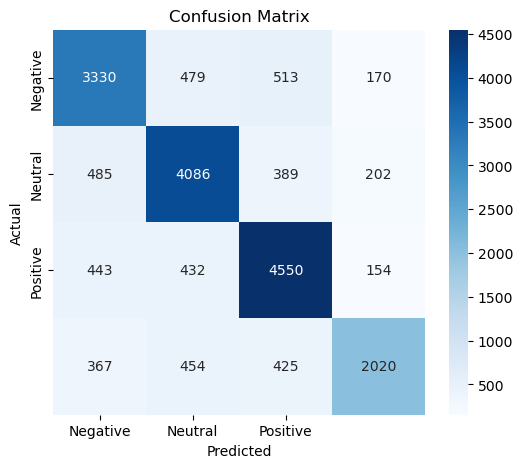

In [525]:
# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
cm_lr = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 7. Random Forest Model


In [526]:
# Changing the model in the pipeline to Random Forest and setting the parameters
pipeline_rf = pipeline.set_params(clf=RandomForestClassifier(n_estimators=100, random_state=42))

In [527]:
# Creating a param grid for hyper-parameter tuning
param_grid_rf = {
    'clf__max_depth': [10, 20, None],  # Tree depth
    'clf__min_samples_split': [2, 5, 10],  # Min samples to split
}

In [528]:
# Creating a grid search 
grid_search = GridSearchCV(pipeline_rf, param_grid=param_grid_rf, cv=3, scoring="accuracy", n_jobs=1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=1,
             param_grid={'clf__max_depth': [10, 20, None],
                         'clf__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [529]:
print("\nBest Hyperparameters from Grid Search:")
print(grid_search.best_params_)
print("\nBest Cross-Validation Score:")
print(grid_search.best_score_)


Best Hyperparameters from Grid Search:
{'clf__max_depth': None, 'clf__min_samples_split': 2}

Best Cross-Validation Score:
0.8493224310580342


#### 8. Evaluating the Random Forest Model

In [530]:
# Getting the best model
best_model_rf = grid_search.best_estimator_

# Predicting using the best model
y_pred_rf = best_model_rf.predict(X_test)


print("\nClassification Report on Validation Data:")
print(classification_report(y_test, y_pred_rf))


Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4492
           1       0.84      0.94      0.89      5162
           2       0.91      0.92      0.91      5579
           3       0.96      0.82      0.89      3266

    accuracy                           0.90     18499
   macro avg       0.90      0.89      0.89     18499
weighted avg       0.90      0.90      0.90     18499



In [531]:
# Getting the accuracy score of the model
accuracy_score_rf = accuracy_score(y_test, y_pred_rf)
accuracy_score_rf

0.8957240931942267

In [533]:
# Validating the results
df_test_results = pd.DataFrame({
    'Tweet': X_test,
    'Actual_Sentiment': y_test,
    'Predicted_Sentiment': y_pred_rf
})

# Display the first few rows to review the results
df_test_results.head(10)

,Tweet,Actual_Sentiment,Predicted_Sentiment
61734,think hurt,3,3
11260,time,1,3
55969,call _ z1rv _ tweet98 got sore as,0,0
4111,cod black ops cold war gon na as realthunder40...,2,2
2308,happy,2,2
65306,gave 69 herbert 75 im sick,2,2
15279,yo hey people retweeting tweet regarding part ...,0,0
69427,log playstation see playstation cancel preorde...,3,3
54803,know 76 best friend talk call duty,2,2
7144,finally hit diamond playing mostly ana im supe...,1,1


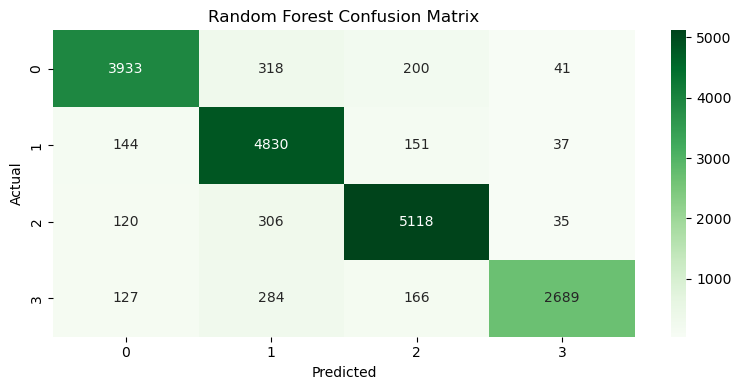

In [534]:
# Plotting confusion matrix for the Random Forest Model
cm_rf = confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(cm_rf, annot=True, fmt='d', ax=ax, cmap='Greens')
ax.set_title('Random Forest Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [535]:
# Choosing best model based on accuracy
if accuracy_score_log_reg >= accuracy_score_rf:
    best_model = 'Logistic Regression'
    best_accuracy = accuracy_score_log_reg
else:
    best_model = 'Random Forest'
    best_accuracy = accuracy_score_rf

print(f"Random Forest with Accuracy an accuracy of {accuracy_score_rf}")

print('\
Conclusions:')
print('After performing EDA, preprocessing the text, and evaluating models, we conclude that ' + best_model + ' is the best with an accuracy \nof ' + str(round(best_accuracy, 4)) + '.')


Random Forest with Accuracy an accuracy of 0.8957240931942267
Conclusions:
After performing EDA, preprocessing the text, and evaluating models, we conclude that Random Forest is the best with an accuracy 
of 0.8957.


#### 9. Testing the Model on Validation data
Now that we have trained our models and evaluated them and found that the Random Forest model with an accuracy score of 89.6%, we need to test the model on completely new data, which is the validation data.

In [536]:
# Creating a function to predict the sentiment using our model
def predict_sentiment(input_text, best_model):
    
    # Predicting the sentiment using the best model
    prediction = best_model_rf.predict([input_text])[0]  # Get the prediction for the input text
    
    # Using an if-else structure to assign labels
    if prediction == 0:
        return 'Neutral'  
    elif prediction == 1:
        return 'Positive'  
    elif prediction == 2:
        return 'Negative'  
    else: 
        return 'Irrelevant'  

In [542]:
# Defining a mapping dictionary for numerical to text labels
sentiment_mapping = {0: "Neutral", 1: "Positive", 2: "Negative", 3: "Irrelevant"}

# Asking the user for the index they want to predict
index = int(input("Enter the index for the Tweet"))

# Retrieve the text from df_val using the entered index
input_text = df_val["Tweet"].iloc[index]

# Predict the sentiment using the best model
predicted_sentiment = predict_sentiment(input_text, best_model)

# Retrieve the actual sentiment (numeric) for the same index
actual_sentiment_num = df_val["Sentiment"].iloc[index]

# Convert actual sentiment from number to text
actual_sentiment = sentiment_mapping.get(actual_sentiment_num, "Unknown") 

# Display the results
print(f"\nTweet: {input_text}")  # I have used index 345 to get the output
print(f"\nPredicted Sentiment: {predicted_sentiment}")  
print(f"\nActual Sentiment: {actual_sentiment}")


Tweet: You have no idea how ready I am for this. Give me Twisted Fate! #LegendsOfRuneterra #LeagueOfLegends

Predicted Sentiment: Neutral

Actual Sentiment: Neutral


* From the above output, it is clear that our model is working on new data. Upon inputing an index, the output provides thebactual tweet, predicted sentiment and the actual sentiment. In this case, it predicts the correct sentiment for our tweet.

#### 10. Findings

##### 1. Strong Sentiment Classification Performance:
* The Baseline Logistic Regression model achieved an accuracy of 76%.
* The score indicates the model's effectiveness in sentiment classification.
* The Random Forest model outperformed the baseline, reaching 89.6% accuracy
* This shows its ability to capture complex sentiment patterns in tweets.

##### 2. Superior Performance of the Random Forest Model:

* The notable accuracy improvement suggests that the Random Forest model is more adept at identifying sentiment nuances compared to logistic regression.

##### 3. Valuable Business Insights:

* With high accuracy, the Random Forest model can serve as a reliable tool for analyzing sentiment toward products, brands, and public figures.
* The ability to classify tweets as Positive, Negative, Neutral or irrelevant enables businesses to refine their marketing strategies, manage their brand reputation, and enhance customer engagement.



#### 11. Conclusion
The results confirm that entity-level sentiment analysis using machine learning models can effectively categorize public sentiment on Twitter. The Random Forest model’s high accuracy (89.6%) makes it a suitable choice for real-world applications where understanding customer perception is essential. Businesses can leverage this model to track brand sentiment, identify emerging trends, and improve customer experience. Future enhancements could include integrating deep learning methods or optimizing feature selection for even greater accuracy.